In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'MS Gothic']

games = pd.read_csv('games.csv', encoding='shift-jis')
print(games.shape)

(4382, 28)


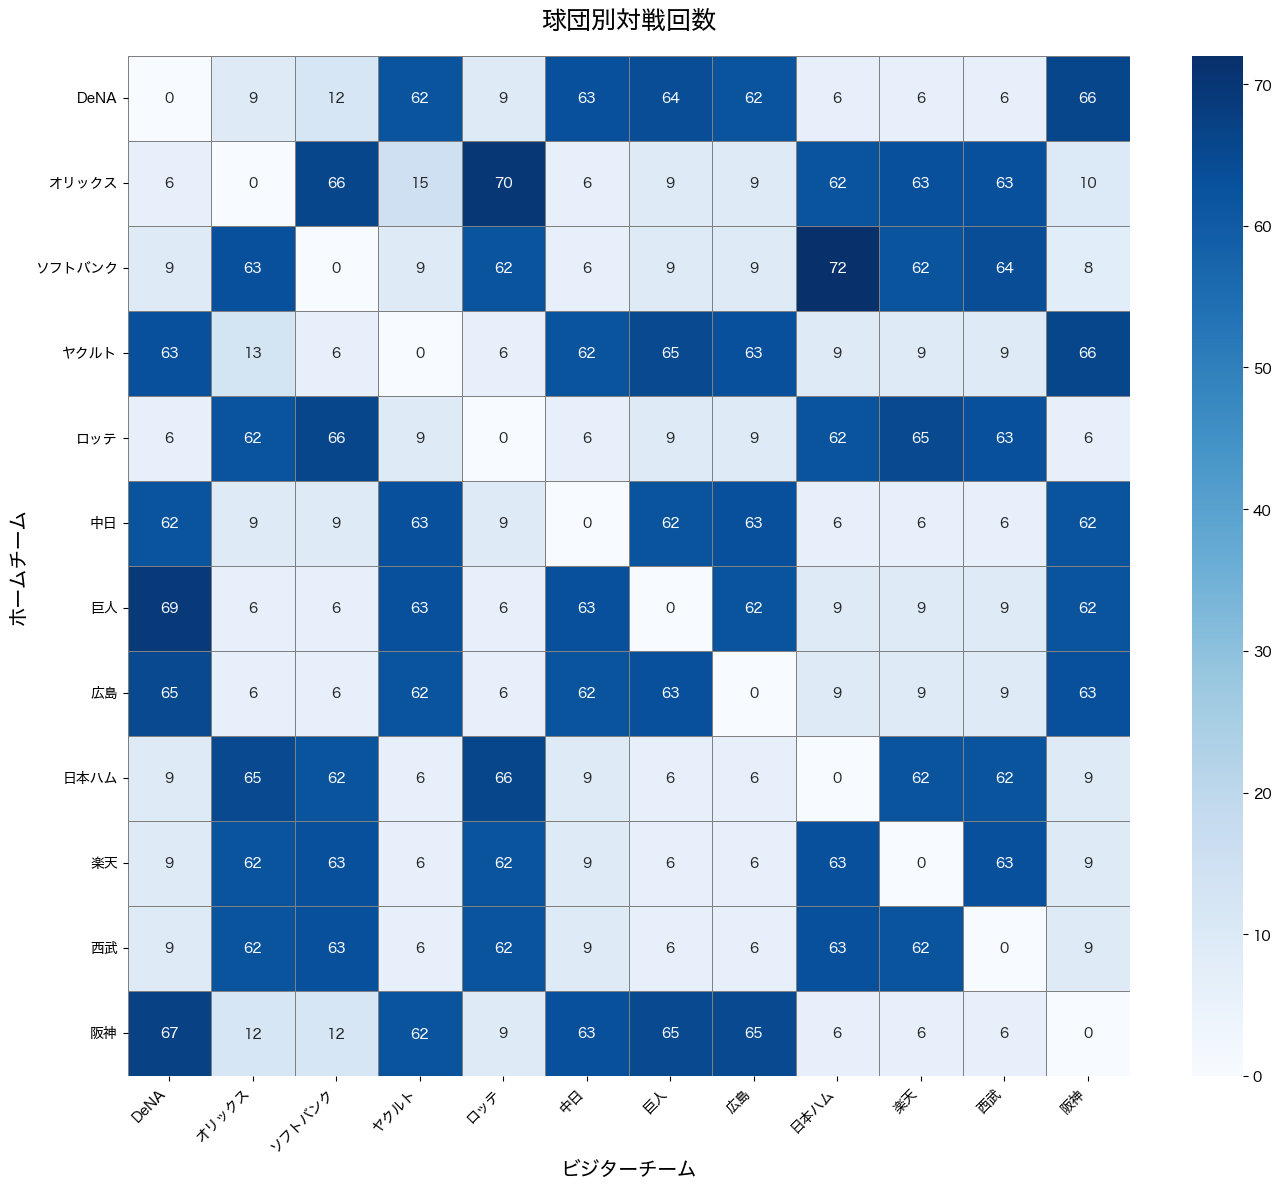

In [7]:
matchup = games.groupby(['home_team_name', 'away_team_name']).size().unstack(fill_value=0)

plt.figure(figsize=(14,12))
sns.heatmap(matchup, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='gray')
plt.title('球団別対戦回数', fontsize=18, pad=20)
plt.xlabel('ビジターチーム', fontsize=14)
plt.ylabel('ホームチーム', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


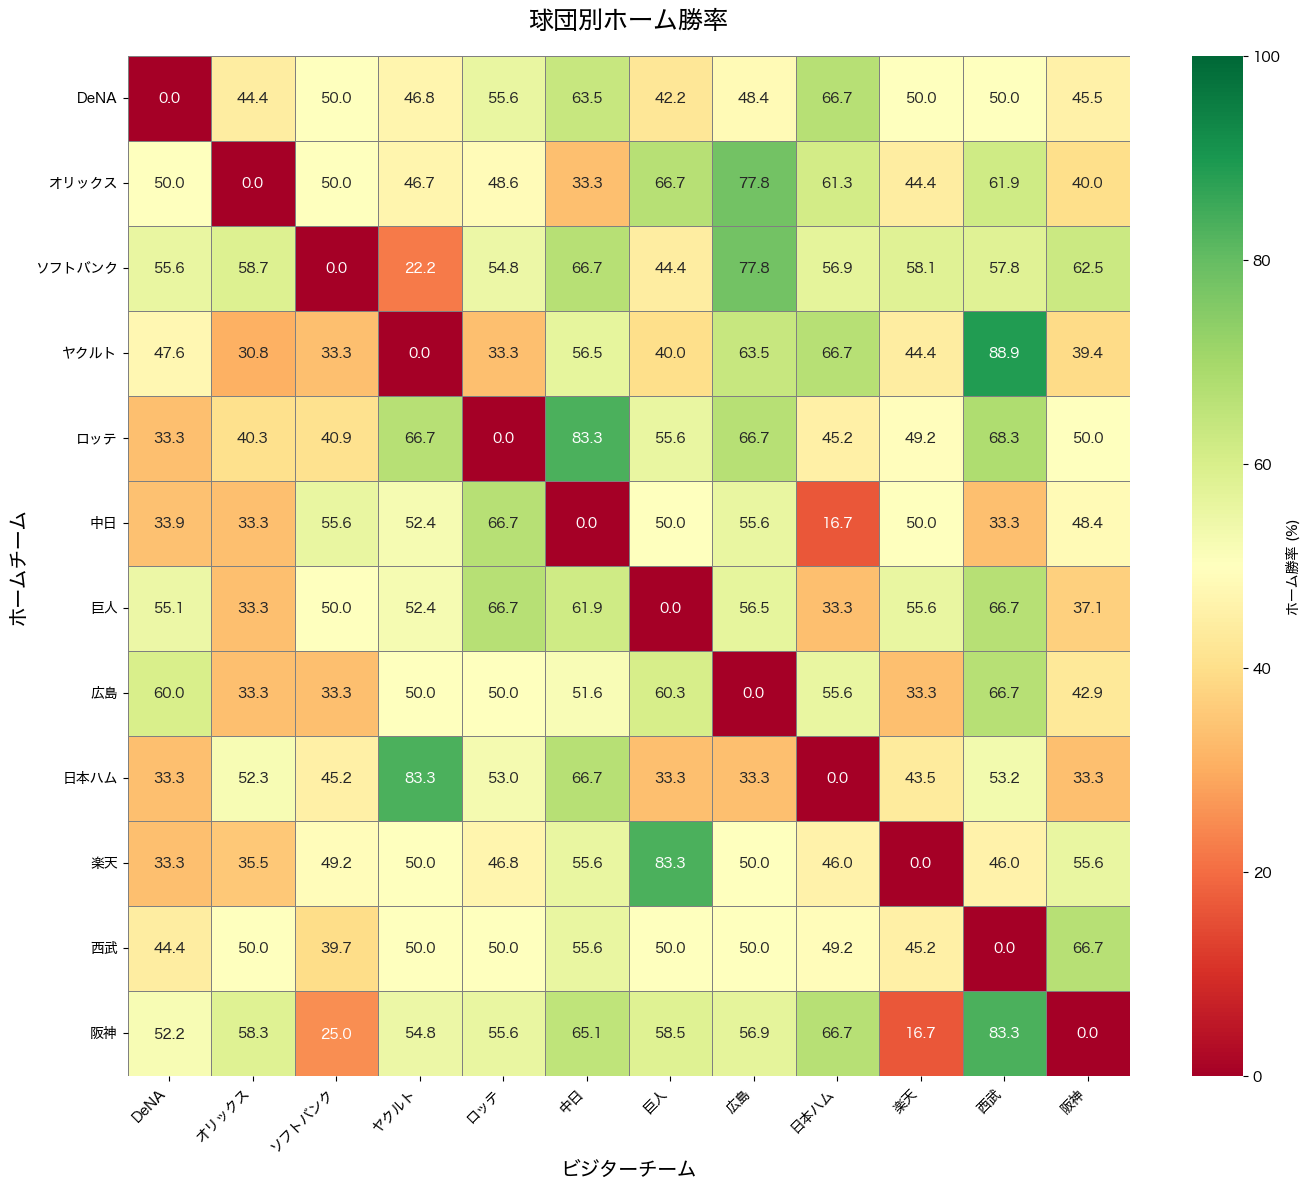

In [8]:
games['home_win'] = (games['home_team_score'] > games['away_team_score']).astype(int)

home_wins = games[games['home_win'] == 1].groupby(['home_team_name', 'away_team_name']).size().unstack(fill_value=0)
total_games = games.groupby(['home_team_name', 'away_team_name']).size().unstack(fill_value=0)

win_rate = (home_wins / total_games * 100).fillna(0)

plt.figure(figsize=(14,12))
sns.heatmap(win_rate, annot=True, fmt='.1f', cmap='RdYlGn', 
            vmin=0, vmax=100, linewidths=0.5, linecolor='gray',
            cbar_kws={'label': 'ホーム勝率 (%)'})
plt.title('球団別ホーム勝率', fontsize=18, pad=20)
plt.xlabel('ビジターチーム', fontsize=14)
plt.ylabel('ホームチーム', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [9]:
team_vs_team = games.groupby(['home_team_name', 'away_team_name']).agg({
    'game_id': 'count',
    'home_team_score': 'sum',
    'away_team_score': 'sum'
})
team_vs_team.columns = ['試合数', 'ホーム総得点', 'ビジター総得点']
team_vs_team['得点差'] = team_vs_team['ホーム総得点'] - team_vs_team['ビジター総得点']

print(team_vs_team.sort_values('得点差', ascending=False).head(20))


                               試合数  ホーム総得点  ビジター総得点  得点差
home_team_name away_team_name                           
DeNA           中日               63     264      158  106
阪神             中日               63     240      152   88
ソフトバンク         楽天               62     310      234   76
広島             DeNA             65     263      195   68
ソフトバンク         オリックス            63     263      200   63
巨人             中日               63     229      167   62
ロッテ            西武               63     246      187   59
阪神             巨人               65     220      165   55
ソフトバンク         西武               64     224      172   52
オリックス          西武               63     234      184   50
巨人             DeNA             69     244      197   47
ロッテ            楽天               65     302      258   44
阪神             広島               65     221      178   43
日本ハム           ロッテ              66     253      210   43
ソフトバンク         ロッテ              62     244      209   35
オリックス          日本ハム            

In [10]:
all_matchups = []

for _, row in games.iterrows():
    teams = sorted([row['home_team_name'], row['away_team_name']])
    matchup_key = f"{teams[0]} vs {teams[1]}"
    winner = row['home_team_name'] if row['home_team_score'] > row['away_team_score'] else row['away_team_name']
    
    all_matchups.append({
        'matchup': matchup_key,
        'winner': winner
    })

matchup_df = pd.DataFrame(all_matchups)

matchup_stats = matchup_df.groupby('matchup').size().reset_index(name='対戦回数')

print(matchup_stats.sort_values('対戦回数', ascending=False))


            matchup  対戦回数
26   ソフトバンク vs 日本ハム   134
10       DeNA vs 阪神   133
5        DeNA vs 巨人   133
13     オリックス vs ロッテ   132
11  オリックス vs ソフトバンク   129
..              ...   ...
35       ヤクルト vs 楽天    15
36       ヤクルト vs 西武    15
38        ロッテ vs 中日    15
39        ロッテ vs 巨人    15
65         西武 vs 阪神    15

[66 rows x 2 columns]
